In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
traindata = pd.read_csv("hr-total-cat-unbalanced.csv",index_col=0)

In [3]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 65438 to 51526
Data columns (total 65 columns):
age                   52399 non-null int64
length_of_service     52399 non-null int64
KPIs_met >80%         52399 non-null int64
awards_won?           52399 non-null int64
avg_training_score    52399 non-null int64
is_promoted           52399 non-null int64
region_10             52399 non-null int64
region_11             52399 non-null int64
region_12             52399 non-null int64
region_13             52399 non-null int64
region_14             52399 non-null int64
region_15             52399 non-null int64
region_16             52399 non-null int64
region_17             52399 non-null int64
region_18             52399 non-null int64
region_19             52399 non-null int64
region_2              52399 non-null int64
region_20             52399 non-null int64
region_21             52399 non-null int64
region_22             52399 non-null int64
region_23             52399

In [4]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

Split data set into training and test sets

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

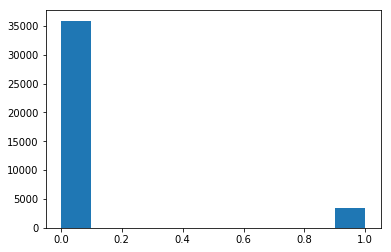

In [6]:
plt.hist(Y_train);
plt.show()

here 0 and 1 are not of same proportion, we assign weight so model gives same priority to yes or no cases.

In [7]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [8]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

In [9]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
lrmodel = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight={0:0.5476144027646174, 1:5.75051214515657})

In [10]:
lrmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0,
          class_weight={0: 0.5476144027646174, 1: 5.75051214515657},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [11]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lrmodel, X, Y, cv=10)
print(cv_results)

[0.7676016  0.76588437 0.7614959  0.78320611 0.76660305 0.76698473
 0.77362092 0.77285742 0.77572056 0.76865814]


In [12]:
np.mean(cv_results)

0.7702632800603072

In [13]:
lrmodel.score(X_train, Y_train)

0.7703249446550803

In [14]:
lrmodel.fit(X_train, Y_train)
Y_predictions = lrmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/confusion-matrix.png", width=400)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predictions)

array([[9217, 2754],
       [ 196,  933]], dtype=int64)

In [18]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/precision-recall-f1score.png",width=500)

In [19]:
print(classification_report(Y_test,Y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     11971
           1       0.25      0.83      0.39      1129

   micro avg       0.77      0.77      0.77     13100
   macro avg       0.62      0.80      0.62     13100
weighted avg       0.92      0.77      0.82     13100



1.High precision means not many people who don't deserve promotion didn't get promoted.

2.High recall means predicted most people who are likely to get promoted.

In [20]:
print("Accuracy:",accuracy_score(Y_test, Y_predictions))

Accuracy: 0.7748091603053435


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

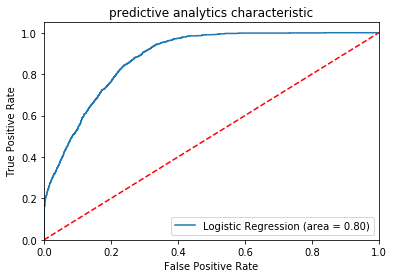

In [22]:
logit_roc_auc = roc_auc_score(Y_test, lrmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lrmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Finding out using test data given in the problem set

In [23]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [24]:
X_testdata1 = X_testdata.values

In [25]:
lrmodel.fit(X, Y)

LogisticRegression(C=1.0,
          class_weight={0: 0.5476144027646174, 1: 5.75051214515657},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [26]:
final_prediction_unknown = lrmodel.predict(X_testdata1)
final_prediction_unknown[0:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [27]:
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [28]:
final

employee_id
8724     1
74430    0
72255    0
38562    0
64486    0
46232    0
54542    0
67269    0
66174    0
76303    1
60245    1
42639    0
30963    0
54055    0
42996    1
12737    0
27561    0
26622    1
31582    0
29793    0
72735    0
5677     0
60889    0
51498    1
8566     0
53151    1
16203    1
61083    1
74849    0
13259    0
        ..
61754    0
72190    1
27155    0
15959    1
72900    1
57683    0
55174    1
51115    0
50134    1
59775    1
14408    0
4351     0
59625    1
29379    1
67979    0
61451    0
73871    0
52090    0
18488    0
59673    1
39410    0
11837    1
78278    1
49291    0
47537    0
53478    0
25600    0
45409    0
1186     0
5973     1
Name: prediction, Length: 22456, dtype: int64